# Helmholtz Operator - Principal Components in a Window

In [168]:
import experimental.helmholtz_1d
import experimental.helmholtz_2d
import experimental.window_svd
import logging
import matplotlib.pyplot as plt
import numpy as np
import sys
from plotly.subplots import make_subplots
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

# Reconfigure logging.
for handler in logging.root.handlers[:]: logging.root.removeHandler(handler)
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(levelname)-8s %(message)s", datefmt="%a, %d %b %Y %H:%M:%S")
logger = logging.getLogger("nb")

%reload_ext autoreload
%autoreload 2

np.set_printoptions(precision=3, linewidth=1000)

## 1D Case

In [169]:
h = 0.01
kh = 0.5
window_shape = (8, )
num_sweeps = 1000
num_components = 2
kh_values = np.linspace(0, 1, 11)
solver_factory = experimental.helmholtz_1d.Helmholtz1d

In [170]:
s, vh = [None] * len(kh_values), [None] * len(kh_values)
for i, kh in enumerate(kh_values):
    logger.info("Generating test matrix, kh {:.2f}".format(kh))
    k = kh / h
    solver = solver_factory(k, h)
    s_current, vh_current = experimental.window_svd.get_window_svd(
        solver.operator, solver.relax_kaczmarz, window_shape, num_sweeps=num_sweeps)
    s[i] = s_current
    vh[i] = vh_current #[:, :num_components]
s = np.array(s)
vh = np.array(vh)

INFO     Generating test matrix, kh 0.00
INFO     Generating test matrix, kh 0.10
INFO     Generating test matrix, kh 0.20
INFO     Generating test matrix, kh 0.30
INFO     Generating test matrix, kh 0.40
INFO     Generating test matrix, kh 0.50
INFO     Generating test matrix, kh 0.60
INFO     Generating test matrix, kh 0.70
INFO     Generating test matrix, kh 0.80
INFO     Generating test matrix, kh 0.90
INFO     Generating test matrix, kh 1.00


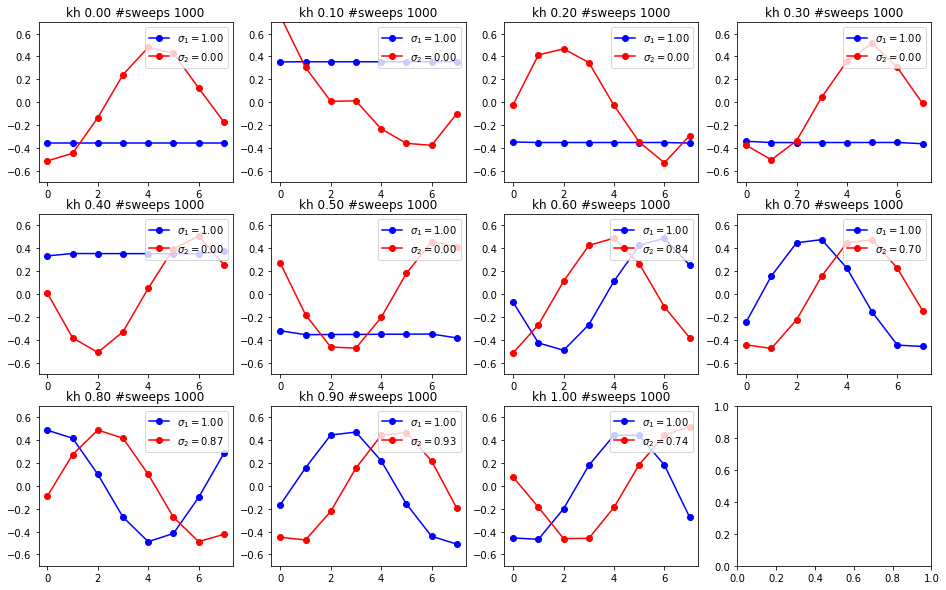

In [171]:
color = ['b', 'r', 'g']
fig, axs = plt.subplots(int(np.ceil(len(kh_values) / 4)), 4, figsize=(16, 10))
for i in range(len(kh_values)):
    ax = axs[i // 4, i % 4]
    for j in range(num_components):
        ax.plot(vh[i][j], '{}o-'.format(color[j  % len(color)]), label="$\sigma_{" + str(j+1) + "} = " + "{:.2f}".format(s[i][j]) + "$")
    ax.set_ylim([-0.7, 0.7])
    ax.legend(loc="upper right")
    ax.set_title("kh {:.2f} #sweeps {}".format(kh_values[i], num_sweeps))

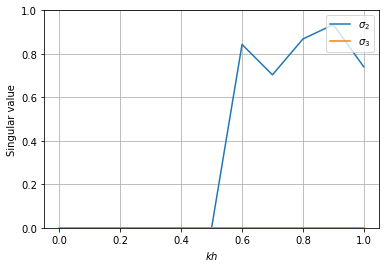

In [172]:
for i in range(1, num_components + 1):
    plt.plot(kh_values, s[:, i], label="$\sigma_{" + str(i+1) + "}$")
plt.grid(True)
plt.ylim([0, 1])
plt.xlabel("$kh$")
plt.ylabel("Singular value")
plt.legend(loc="upper right");

## 2D Case

In [179]:
h = 0.01
kh = 0.5
window_shape = (16, 16)
num_sweeps = 1000
kh_values = np.linspace(0, 1, 11)
solver_factory = experimental.helmholtz_2d.Helmholtz2d

In [ ]:
s, vh = [None] * len(kh_values), [None] * len(kh_values)
for i, kh in enumerate(kh_values):
    logger.info("Generating test matrix, kh {:.2f}".format(kh))
    k = kh / h
    solver = solver_factory(k, h)
    s_current, vh_current = experimental.window_svd.get_window_svd(
        solver.operator, solver.relax_kaczmarz, window_shape, num_sweeps=num_sweeps)
    s[i] = s_current
    vh[i] = vh_current #[:, :num_components]
s = np.array(s)
vh = np.array(vh)

INFO     Generating test matrix, kh 0.00


In [ ]:
num_components = 5

In [ ]:
for i in range(1, num_components + 1):
    plt.plot(kh_values, s[:, i], label="$\sigma_{" + str(i+1) + "}$")
plt.grid(True)
plt.ylim([0, 1])
plt.xlabel("$kh$")
plt.ylabel("Singular value")
plt.legend(loc="upper right");

In [ ]:
color = ['b', 'r', 'g', 'k']
#fig = plt.figure()#figsize=plt.figaspect(0.5))
fig = plt.figure(figsize=(20, 40))
    
x, y = np.arange(window_shape[0]), np.arange(window_shape[1])
X, Y = np.meshgrid(x, y)
for row in range(len(kh_values)):
    for col in range(num_components):
        ax = fig.add_subplot(len(kh_values), num_components, num_components * row + col + 1, projection='3d')
        pc = vh[row][col].reshape(window_shape)
        ax.plot_surface(X, Y, pc)
        ax.set_title("kh {:.2f} ".format(kh_values[row]) + \
                     "$\sigma_{" + str(j+1) + "} = " + "{:.2f}".format(s[row][col]) + "$")